In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout,Activation,BatchNormalization
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
import os

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
train_data = pd.read_csv('csvTrainImages 13440x1024.csv', header = None).values
train_label = pd.read_csv('csvTrainLabel 13440x1.csv', header = None)
test_data = pd.read_csv('csvTestImages 3360x1024.csv', header = None).values
test_label = pd.read_csv('csvTestLabel 3360x1.csv', header = None)

In [4]:
train_label = train_label.squeeze()
test_label = test_label.squeeze()

In [5]:
characters = ["ا","ب","ت","ث","ج","ح","خ","د","ذ","ر","ز","س","ش","ص","ض","ط","ظ","ع","غ","ف","ق","ك","ل","م","ن","ه","و","ي"]
characters_dict = dict(zip(np.arange(1,len(characters)+1), characters))

In [6]:
train_label = train_label.map(characters_dict).values
test_label = test_label.map(characters_dict).values

In [7]:
x_train = (train_data).reshape(-1,32,32,1)
x_test = (test_data).reshape(-1,32,32,1)

In [8]:
x_train,train_label = shuffle(x_train,train_label)
x_test,test_label = shuffle(x_test,test_label)

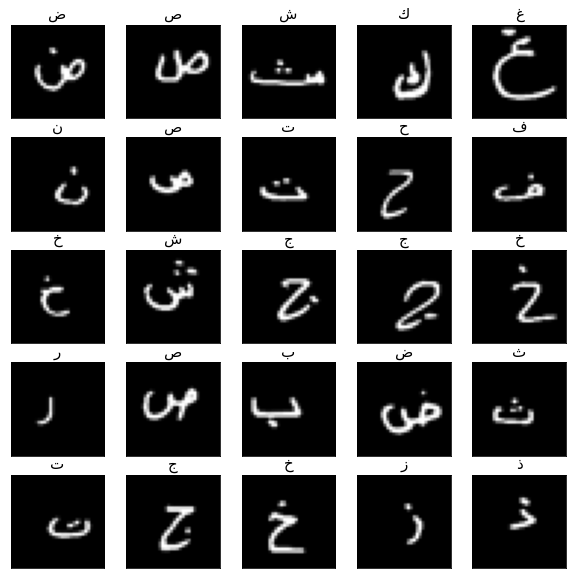

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape(32,32).T,"gray")
    plt.title(train_label[i][0],fontsize = 15)
plt.show()

In [10]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
train_label = lb.fit_transform(train_label)
test_label = lb.fit_transform(test_label)

In [11]:
train_datagen=ImageDataGenerator(
    zoom_range=0.2, #the amount of zooming u need
    horizontal_flip=True, # Make a horizontal copy of image
    rescale=1/255, # Normalize the new images
    width_shift_range=0.10, # The percentage of Width shifitning
    height_shift_range=0.10, # The percentage of height shifitning
    shear_range=0.1, #Shear angle in counter-clockwise direction in degrees
    fill_mode='nearest',
    rotation_range=20, 
)
train_generator=train_datagen.flow(
    x_train ,train_label ,batch_size=64
)

test_datagen=ImageDataGenerator(rescale=1/255)
test_generator=test_datagen.flow(
    x_test ,test_label ,batch_size=64
 
)

In [12]:
earlystop=EarlyStopping(patience=6)
learning_rate_reduction=ReduceLROnPlateau(
    monitor='val_acc',
    patience= 3,
    verbose=1,
)
callbacks = [earlystop, learning_rate_reduction]

In [13]:
model=Sequential() 

model.add(Conv2D(32,(5,5), padding="same",activation='relu',input_shape=(32,32,1)))
model.add(Conv2D(32,(5,5), padding="same",activation='relu'))
model.add(Conv2D(32,(5,5),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(28,activation='softmax'))

In [14]:
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        25632     
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                        

In [16]:
model.fit(
    train_generator, 
    epochs=50,
    validation_data=test_generator,
    callbacks=callbacks
)

Epoch 1/50
210/210 [==============================] - 87s 410ms/step - loss: 2.7857 - accuracy: 0.1574 - val_loss: 1.6555 - val_accuracy: 0.4411 - lr: 0.0010
Epoch 2/50
210/210 [==============================] - 96s 455ms/step - loss: 1.8155 - accuracy: 0.3837 - val_loss: 0.9824 - val_accuracy: 0.6738 - lr: 0.0010
Epoch 3/50
210/210 [==============================] - 85s 406ms/step - loss: 1.3864 - accuracy: 0.5230 - val_loss: 0.8144 - val_accuracy: 0.6818 - lr: 0.0010
Epoch 4/50
210/210 [==============================] - 77s 368ms/step - loss: 1.1434 - accuracy: 0.6062 - val_loss: 0.6304 - val_accuracy: 0.7711 - lr: 0.0010
Epoch 5/50
210/210 [==============================] - 70s 333ms/step - loss: 0.9778 - accuracy: 0.6705 - val_loss: 0.4689 - val_accuracy: 0.8393 - lr: 0.0010
Epoch 6/50
210/210 [==============================] - 82s 389ms/step - loss: 0.8480 - accuracy: 0.7147 - val_loss: 0.3937 - val_accuracy: 0.8732 - lr: 0.0010
Epoch 7/50
210/210 [==============================] 

210/210 [==============================] - 66s 316ms/step - loss: 0.2453 - accuracy: 0.9212 - val_loss: 0.1413 - val_accuracy: 0.9589 - lr: 0.0010
Epoch 42/50
210/210 [==============================] - 66s 315ms/step - loss: 0.2535 - accuracy: 0.9211 - val_loss: 0.1608 - val_accuracy: 0.9554 - lr: 0.0010
Epoch 43/50
210/210 [==============================] - 66s 316ms/step - loss: 0.2505 - accuracy: 0.9219 - val_loss: 0.1322 - val_accuracy: 0.9682 - lr: 0.0010
Epoch 44/50
210/210 [==============================] - 68s 326ms/step - loss: 0.2501 - accuracy: 0.9237 - val_loss: 0.1213 - val_accuracy: 0.9643 - lr: 0.0010
Epoch 45/50
210/210 [==============================] - 67s 319ms/step - loss: 0.2421 - accuracy: 0.9252 - val_loss: 0.1384 - val_accuracy: 0.9607 - lr: 0.0010
Epoch 46/50
210/210 [==============================] - 67s 318ms/step - loss: 0.2320 - accuracy: 0.9312 - val_loss: 0.1231 - val_accuracy: 0.9640 - lr: 0.0010
Epoch 47/50
210/210 [==============================] - 67s

<AxesSubplot:>

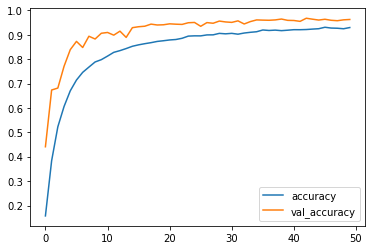

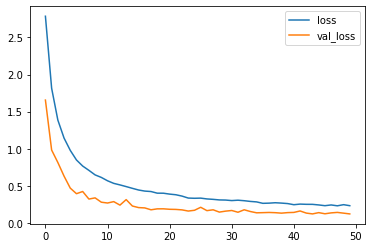

In [17]:
losses = pd.DataFrame(model.history.history)
losses[['accuracy','val_accuracy']].plot()
losses[['loss','val_loss']].plot()

In [18]:
model.evaluate(test_generator)

53/53 [==============================] - 4s 72ms/step - loss: 0.1211 - accuracy: 0.9631


[0.12113874405622482, 0.9630952477455139]